<h1><left><font color=purple> Bootcamp Project </font></left></h1>

<h1><left><font color=blue> Telco customer churn </font></left></h1>

**Instructions**

We have done extensive EDA and built 2 supervised machine learning models with our telecom churn dataset, and derived some insights, but can we use the same dataset to answer a different question?
 
* The head of marketing wants to understand how her team can optimize their marketing spend in acquiring new customers. The questions you will answering are:
Can you determine which types of people marketing should focus on for their marketing campaigns?  (Assume that these customers live in the USA).
In addition, how can marketing make their campaigns more effective?

A short presentation of your analysis, key insights, and recommendations to the team as to how they can optimize their marketing efforts to attract new potential customers.

<h5><right><font color=grey> Ismail Muallaoglu Feb 10, 2021 </font></right></h5>
<h5><right><font color=grey> Hyper Island </font></right></h5>

---

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams
%matplotlib inline

sns.set_style('darkgrid') # To have a background of grids in the plots

# Loading the CSV with pandas
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Column definitions:**

**CustomerID       :** *_CustomerID_*\
**gender           :** *_Whether the customer is a male or female_*\
**SeniorCitizen    :** *_Whether the customer is a senior citizen or not (1,0)_*\
**Partner          :** *_Whether the customer has a partner or not (Yes, No)_*\
**Dependents       :** *_Whether the customers has dependents or not (Yes, No)_*\
**tenure           :** *_Number of the months the customer has stayed with the company_*\
**PhoneService     :** *_Whether the customer has a phone service or not (Yes, No)_*\
**MultipleLines    :** *_Whether the customer has multiple lines or not (Yes, No, No phone service)_*\
**InternetService  :** *_Customer's internet service provider (DSL, Fiber optic, No)_*\
**OnlineSecurity   :** *_Whether the customer has online security or not (Yes, No, No internet service)_*\
**OnlineBackup     :** *_Whether the customer has online backup or not (Yes, No, No internet service)_*\
**DeviceProtection :** *_Whether the customer has device protection or not (Yes, No, No internet service)_*\
**TechSupport      :** *_Whether the customer has tech support or not (Yes, No, No internet service)_*\
**StreamingTV      :** *_Whether the customer has streaming TV or not (Yes, No, No internet service)_*\
**StreamingMovies  :** *_Whether the customer has streaming movies or not (Yes, No, No internet service)_*\
**Contract         :** *_The contract term of the customer (Month-to-month, One year, Two year)_*\
**PaperlessBilling :** *_Whether the customer has paperless billing or not (Yes, No)_*\
**PaymentMethod    :** *_The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))_*\
**MonthlyCharges   :** *_The amount charged to the customer monthly_*\
**TotalCharges     :** *_The total amount charged to the customer_*\
**Churn            :** *_Whether the customer churned or not (Yes or No)_*

---

<h3><left><font color=grey><span style='background :yellow'>Step 1: Exploratory Data Analysis: Perform descriptive statistics & visualization to get the sense of the data</span></font></left></h3>

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We're lucky, there's no null values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# I wonder if there's any duplicated customerID

data['customerID'].duplicated().any()

False

In [7]:
# Taking a look if there's a missing value

data.isnull().values.any()

False

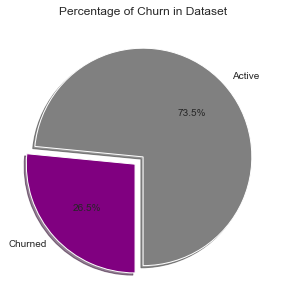

In [256]:
# Data to plot
labels = 'Active', 'Churned'
sizes = data['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
explode = (0, 0.1)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.savefig('Churn_percentage.png')
plt.show()

In detail we have a look at the target feature, the actual “Churn”. Therefore we plot it accordingly and see that 26,5% Of the total amount of customer churn. This is important to know so we have the same proportion of Churned Customers to Non-Churned Customers in our training data.

<h3><left><font color=grey><span style='background :yellow'>Step 2: Data Preparation | Cleaning</span></font></left></h3>

Since we looked before that there's no duplicated CustomerID and it's not a relevant feature to our analysis, we will drop it from the dataset.

In [9]:
data.drop(['customerID'], axis=1, inplace=True)

In [10]:
# Convert categorical columns' data types to category

category_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService",\
                 "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",\
                 "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

data[category_cols] = data[category_cols].astype('category')

In [11]:
# Convert total charges to float;
    
    # since it doesn't allow us to do it for string, we need to check whether there's empty strings

empty_total_charges = data[data["TotalCharges"] == " "] 
    # If we look at empty_total_charges table, we see the reason is all tenure records are 0. I'll replace totals with 0.

data["TotalCharges"] = data["TotalCharges"].replace(" ", 0)    

    # Now we can convert total charges to float
    
data["TotalCharges"] = data["TotalCharges"].astype('float64')

In [12]:
# We must reduce categorical columns to binaries

data["MultipleLines"] = data["MultipleLines"].replace({'No phone service' : 'No'})
data["OnlineSecurity"] = data["OnlineSecurity"].replace({'No internet service' : 'No'})
data["OnlineBackup"] = data["OnlineBackup"].replace({'No internet service' : 'No'})
data["DeviceProtection"] = data["DeviceProtection"].replace({'No internet service' : 'No'})
data["TechSupport"] = data["TechSupport"].replace({'No internet service' : 'No'})
data["StreamingTV"] = data["StreamingTV"].replace({'No internet service' : 'No'})
data["StreamingMovies"] = data["StreamingMovies"].replace({'No internet service' : 'No'})
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes", 0:"No"})

In [13]:
# The datatypes of the columns need to be changed again

data[category_cols] = data[category_cols].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [14]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

data['Male_flag'] = lb.fit_transform(data['gender'])
data['SeniorCitizen_flag'] = lb.fit_transform(data['SeniorCitizen'])
data['Partner_flag'] = lb.fit_transform(data['Partner'])
data['Dependents_flag'] = lb.fit_transform(data['Dependents'])
data['PhoneService_flag'] = lb.fit_transform(data['PhoneService'])
data['MultipleLines_flag'] = lb.fit_transform(data['MultipleLines'])
data['DSL_flag'] = lb.fit_transform(data['InternetService'])[:,0]
data['fiber_flag'] = lb.fit_transform(data['InternetService'])[:,1]
data['InternetService_No'] = lb.fit_transform(data['InternetService'])[:,2]
data['OnlineSecurity_flag'] = lb.fit_transform(data['OnlineSecurity'])
data['OnlineBackup_flag'] = lb.fit_transform(data['OnlineBackup'])
data['DeviceProtection_flag'] = lb.fit_transform(data['DeviceProtection'])
data['TechSupport_flag'] = lb.fit_transform(data['TechSupport'])
data['StreamingTV_flag'] = lb.fit_transform(data['StreamingTV'])
data['StreamingMovies_flag'] = lb.fit_transform(data['StreamingMovies'])
data['Contract_Month'] = lb.fit_transform(data['Contract'])[:,0]
data['Contract_One'] = lb.fit_transform(data['Contract'])[:,1]
data['Contract_Two'] = lb.fit_transform(data['Contract'])[:,2]
data['PaperlessBilling_flag'] = lb.fit_transform(data['PaperlessBilling'])
data['Electronic check'] = lb.fit_transform(data['PaymentMethod'])[:,2]
data['Mailed check'] = lb.fit_transform(data['PaymentMethod'])[:,3]
data['Bank transfer (automatic)'] = lb.fit_transform(data['PaymentMethod'])[:,0]
data['Credit card (automatic)'] = lb.fit_transform(data['PaymentMethod'])[:,1]
data['Churn_flag'] = lb.fit_transform(data['Churn'])

<h3><left><font color=grey><span style='background :yellow'>Step 3: Model Evaluation | AUC</span></font></left></h3>


**Once you collected all the candidate predictors, you can build a logistic regression model**\
Drawbacks of models with many variables:\
*Over-fitting*\
*Hard to maintain or implement*\
*Hard to interpret, multi-collinearity*

That's why we'll try to reach the maximum AUC with the least variables used.

**Procedure**\
*Empty set*\
*Find best variable v1*\
*Find best variable v2 in combination with v1*\
*Find best variable v3 in combination with v1, v2*\
*...*\
*(Until all variables are added or until predefined number of variables is added)*

In [15]:
# Import the linear_model and roc_auc_score modules
from sklearn import linear_model
from sklearn.metrics import roc_auc_score

basetable = data[["Male_flag", "SeniorCitizen_flag", "Partner_flag", "Dependents_flag", "PhoneService_flag",\
             "MultipleLines_flag", "DSL_flag", "fiber_flag", "InternetService_No", "OnlineSecurity_flag",\
             "OnlineBackup_flag", "DeviceProtection_flag", "TechSupport_flag", "StreamingTV_flag", "StreamingMovies_flag",\
             "Contract_Month", "Contract_One", "Contract_Two", "PaperlessBilling_flag", "Electronic check",\
             "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)",\
             "tenure", "MonthlyCharges", "TotalCharges", "Churn_flag"]]

variables = basetable.drop(labels = ["Churn_flag"],axis = 1)
target = basetable.Churn_flag

In [16]:
# function to calculate AUC

def auc(variables, target, basetable):
    X = basetable[variables]
    Y = basetable[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, Y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)

In [17]:
# Function to calculate next best variable

def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    
    # Calculate the auc score of adding v to the current variables
    for v in candidate_variables:
        auc_v = auc(current_variables + [v],target, basetable)
        
        # Update best_auc and best_variable adding v led to a better auc score
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
            
    return best_variable

In [18]:
candidate_variables = list(basetable.columns.values)
candidate_variables.remove("Churn_flag")
current_variables = []
target = ["Churn_flag"]
max_number_variables = len(candidate_variables)
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, target, basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
print(current_variables)

['tenure', 'fiber_flag', 'Contract_Month', 'InternetService_No', 'Electronic check', 'OnlineSecurity_flag', 'PaperlessBilling_flag', 'StreamingMovies_flag', 'TechSupport_flag', 'Contract_Two', 'TotalCharges', 'PhoneService_flag', 'MultipleLines_flag', 'OnlineBackup_flag', 'StreamingTV_flag', 'SeniorCitizen_flag', 'Credit card (automatic)', 'Mailed check', 'Male_flag', 'Dependents_flag', 'Contract_One', 'Partner_flag', 'DeviceProtection_flag', 'DSL_flag', 'Bank transfer (automatic)', 'MonthlyCharges']


**These variables stand in line from best to least**

In [19]:
# Calculate the AUC of the model using 'tenure' only
auc_tenure = auc(["tenure"], ["Churn_flag"], basetable)
print(round(auc_tenure,2))

0.74


In [20]:
# Calculate the AUC of the model using 'tenure', 'fiber_flag' 
auc_first2 = auc(['tenure', 'fiber_flag'], ["Churn_flag"], basetable)
print(round(auc_first2,2))

0.81


In [21]:
# Calculate the AUC of the model using 'tenure', 'fiber_flag', 'Contract_Month' 
auc_first3 = auc(['tenure', 'fiber_flag', 'Contract_Month'], ["Churn_flag"], basetable)
print(round(auc_first3,2))

0.83


In [22]:
# Calculate the AUC of the model using 'tenure', 'fiber_flag', 'Contract_Month', 'InternetService_No' 
auc_first4 = auc(['tenure', 'fiber_flag', 'Contract_Month', 'InternetService_No'], ["Churn_flag"], basetable)
print(round(auc_first4,2))

0.83


In [23]:
print("AUC of the model using the first 1 best variable is: "\
      + str(round(auc(current_variables[0:1], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 2 best variable is: "\
      + str(round(auc(current_variables[0:2], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 3 best variable is: "\
      + str(round(auc(current_variables[0:3], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 4 best variable is: "\
      + str(round(auc(current_variables[0:4], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 5 best variable is: "\
      + str(round(auc(current_variables[0:5], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 6 best variable is: "\
      + str(round(auc(current_variables[0:6], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 7 best variable is: "\
      + str(round(auc(current_variables[0:7], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 8 best variable is: "\
      + str(round(auc(current_variables[0:8], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 9 best variable is: "\
      + str(round(auc(current_variables[0:9], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 10 best variable is: "\
      + str(round(auc(current_variables[0:10], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 11 best variable is: "\
      + str(round(auc(current_variables[0:11], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 12 best variable is: "\
      + str(round(auc(current_variables[0:12], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 13 best variable is: "\
      + str(round(auc(current_variables[0:13], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 14 best variable is: "\
      + str(round(auc(current_variables[0:14], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 15 best variable is: "\
      + str(round(auc(current_variables[0:15], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 16 best variable is: "\
      + str(round(auc(current_variables[0:16], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 17 best variable is: "\
      + str(round(auc(current_variables[0:17], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 18 best variable is: "\
      + str(round(auc(current_variables[0:18], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 19 best variable is: "\
      + str(round(auc(current_variables[0:19], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 20 best variable is: "\
      + str(round(auc(current_variables[0:20], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 21 best variable is: "\
      + str(round(auc(current_variables[0:21], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 22 best variable is: "\
      + str(round(auc(current_variables[0:22], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 23 best variable is: "\
      + str(round(auc(current_variables[0:23], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 24 best variable is: "\
      + str(round(auc(current_variables[0:24], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 25 best variable is: "\
      + str(round(auc(current_variables[0:25], ["Churn_flag"], basetable),2)))
print("AUC of the model using the first 26 best variable is: "\
      + str(round(auc(current_variables[0:26], ["Churn_flag"], basetable),2)))

AUC of the model using the first 1 best variable is: 0.74
AUC of the model using the first 2 best variable is: 0.81
AUC of the model using the first 3 best variable is: 0.83
AUC of the model using the first 4 best variable is: 0.83
AUC of the model using the first 5 best variable is: 0.84
AUC of the model using the first 6 best variable is: 0.84
AUC of the model using the first 7 best variable is: 0.84
AUC of the model using the first 8 best variable is: 0.84
AUC of the model using the first 9 best variable is: 0.84
AUC of the model using the first 10 best variable is: 0.84
AUC of the model using the first 11 best variable is: 0.84
AUC of the model using the first 12 best variable is: 0.85
AUC of the model using the first 13 best variable is: 0.85
AUC of the model using the first 14 best variable is: 0.85
AUC of the model using the first 15 best variable is: 0.85
AUC of the model using the first 16 best variable is: 0.85
AUC of the model using the first 17 best variable is: 0.85
AUC of

fiber_flag -> it turns 1 if a customer has internet service and it's fiber
InternetService_No -> if a customer has no internet service. 

if fiber is 1, the other should be 0 or reverse
That's why I take the first 3 variables for my final model.

<h3><left><font color=grey><span style='background :yellow'>Step 4: Partitioning</span></font></left></h3>

In [24]:
from sklearn.model_selection import train_test_split

# Create dataframes with variables and target
X = basetable[['tenure', 'fiber_flag', 'Contract_Month', 'InternetService_No', 'Electronic check', 'OnlineSecurity_flag',\
               'PaperlessBilling_flag', 'StreamingMovies_flag', 'TechSupport_flag', 'Contract_Two', 'TotalCharges',\
               'PhoneService_flag', 'MultipleLines_flag', 'OnlineBackup_flag', 'StreamingTV_flag', 'SeniorCitizen_flag',\
               'Credit card (automatic)', 'Mailed check', 'Male_flag', 'Dependents_flag', 'Contract_One', 'Partner_flag',\
               'DeviceProtection_flag', 'DSL_flag', 'Bank transfer (automatic)', 'MonthlyCharges']]
Y = basetable.Churn_flag

# Carry out 50-50 partititioning with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify = Y)

In [25]:
# Create the final train and test basetables
train = pd.concat([X_train, Y_train], axis=1)
test = pd.concat([X_test, Y_test], axis=1)

In [26]:
# Check whether train and test have same percentage Churns (to be sure of balance)
print(round(sum(train["Churn_flag"])/len(train), 2))
print(round(sum(test["Churn_flag"])/len(test), 2))

0.27
0.27


In [27]:
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
def auc_train_test(X, Y, train, test):
    X_train = train[X]
    X_test = test[X]
    Y_train = train[Y]
    Y_test = test[Y]
    logreg = linear_model.LogisticRegression()
    
    # Fit the model on train data
    logreg.fit(X_train, Y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_test,predictions_test)
    return(auc_train, auc_test)

In [28]:
# Apply the auc_train_test function
auc_train, auc_test = auc_train_test(["tenure" , "fiber_flag", "Contract_Month"], ["Churn_flag"], train, test)
print(round(auc_train,2))
print(round(auc_test,2))

0.82
0.84


In [29]:
# Variable order resulting from the forward stepwise variable selection procedure
variables = ['tenure', 'fiber_flag', 'Contract_Month', 'InternetService_No', 'Electronic check', 'OnlineSecurity_flag', 'PaperlessBilling_flag', 'StreamingMovies_flag', 'TechSupport_flag', 'Contract_Two', 'TotalCharges', 'PhoneService_flag', 'MultipleLines_flag', 'OnlineBackup_flag', 'StreamingTV_flag', 'SeniorCitizen_flag', 'Credit card (automatic)', 'Mailed check', 'Male_flag', 'Dependents_flag', 'Contract_One', 'Partner_flag', 'DeviceProtection_flag', 'DSL_flag', 'Bank transfer (automatic)', 'MonthlyCharges']

# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []

In [30]:
# Add variables one by one
variables_evaluate = []

# Iterate over the variables in variables
for v in variables:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate, ["Churn_flag"], train,test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

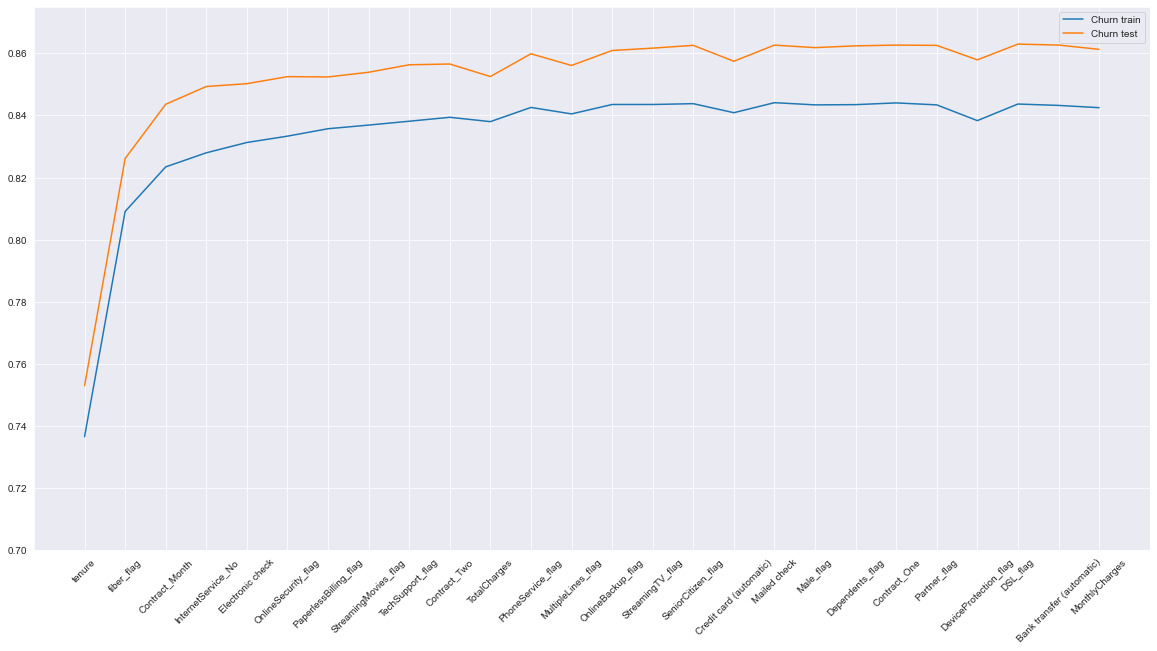

In [31]:
# Make plot of the AUC values
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables, rotation = 45)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.7, 0.875))
plt.legend(['Churn train', 'Churn test'], loc=0)
plt.show()

<h3><left><font color=grey><span style='background :yellow'>Step 5: Prediction</span></font></left></h3>

In [32]:
# What to put in the model?
X = basetable[['tenure', 'fiber_flag', 'Contract_Month']]
y = basetable.Churn_flag

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression()

In [34]:
log_mod.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Making prediction. We use the test set to make predictions. This shows how our model works with the new data

predictions = log_mod.predict(X_test)
probas = log_mod.predict_proba(X_test)

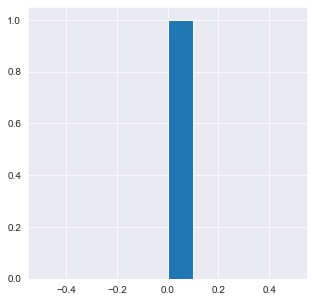

In [36]:
plt.hist(predictions.T[1]);

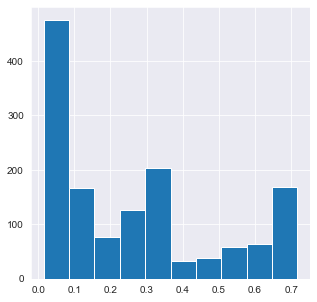

In [37]:
plt.hist(probas.T[1]);

In [38]:
print(probas.max())
print(probas.min())

0.9845079581506994
0.015492041849300593


In [39]:
# To get the weights of all the variables (coefficients)
weights = pd.Series(log_mod.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

fiber_flag        1.621285
Contract_Month    1.184887
tenure           -0.032044
dtype: float64

<h3><left><font color=grey><span style='background :yellow'>Step 6: Model Evaluation</span></font></left></h3>

How we do evaluate if our model is accurate? We use we what is called classification metrics:
- Confusion Matrix
- Accuracy score
- Precision score
- Recall score
- ROC curve
- Precision/Recall curve 

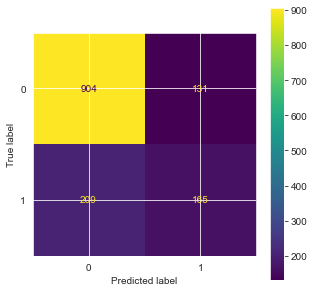

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_mod, X_test, y_test)

In [41]:
TN = conf_matrix[0,0] #this is how the matrix shaped
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

#Accuracy: proportion of correct predictions (best is 1)
#accuracy = (TN + TP) / (TN + FN + FP + TP)

accuracy = (TN + TP) / (TN + TP + FN + FP)
print("Accuracy is: " +"{:.2%}".format(accuracy))

#Sensitivity: proportion of true positives (recall)
#Sensitivity = TP / (FN + TP)

sensitivity = TP / (FN + TP)
print("Sensitivity (Recall) is: " +"{:.2%}".format(sensitivity))

#Specificity: proportion of true negatives
#specificity = TN / (TN + FP)

specificity = TN / (TN + FP)
print("Specificity is: " +"{:.2%}".format(specificity))

# Precision: proportion of true positives out of all positives (best is 1)
precision = TP / (TP+FP)
print("Precision is: " +"{:.2%}".format(precision))

Accuracy is: 75.87%
Sensitivity (Recall) is: 44.12%
Specificity is: 87.34%
Precision is: 55.74%


The score show us that in 76% of the cases our model predicted the right outcome for our binary classification problem. That’s considered quite good for a first run, especially when we look which impact each variable has and if that makes sense.

**ROC Curve**

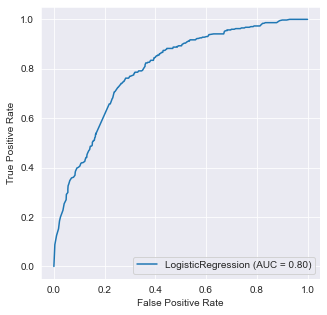

In [42]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
plot_roc_curve(log_mod, X_test, y_test);

**Precision/Recall Curve**

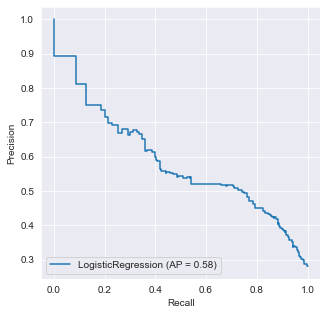

In [43]:
plot_precision_recall_curve(log_mod, X_test, y_test);

# Conclusion for Model

We have obtained a maximum accuracy of 76% to determine whether a person churns or not. 
- The recall score is bad as this shows the total of true positives captured. 
- While having monthly contract and fiber internet have positive effect on Churn, tenure has negative effect 

<h3><left><font color=grey><span style='background :yellow'>Step 7: Prediction of retention length </span></font></left></h3>

**I: Define a dataset where all customers churned**

In [135]:
churned = basetable[basetable["Churn_flag"] == 1]
churned.drop(['Churn_flag', 'tenure_bin'], axis=1, inplace=True)

**II: Define explanatory variables and responding variable for multiple regression**

In [142]:
from statsmodels.formula.api import ols

x_var = ['fiber_flag', 'Contract_Month', 'InternetService_No', 'Electronic check',\
         'OnlineSecurity_flag', 'PaperlessBilling_flag', 'StreamingMovies_flag', 'TechSupport_flag',\
         'Contract_Two', 'TotalCharges', 'PhoneService_flag', 'MultipleLines_flag', 'OnlineBackup_flag',\
         'StreamingTV_flag', 'SeniorCitizen_flag', 'Credit card (automatic)', 'Mailed check', 'Male_flag',\
         'Dependents_flag', 'Contract_One', 'Partner_flag', 'DeviceProtection_flag', 'DSL_flag',\
         'Bank transfer (automatic)', 'MonthlyCharges']

X = churned[x_var]
Y = churned["tenure"]

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

In [144]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [145]:
import scipy

#lets first collect the coeffienct and intercept
params = np.append(lr.intercept_,lr.coef_)

#Lets predict the train data with the calculated parameters
predictions = lr.predict(X_train)

#

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X)).dropna()
MSE = (sum((Y_train-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(abs(np.linalg.inv(np.dot(newX.T,newX)).diagonal())) # abs for avoiding negative values in array (problem for sqrt)
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b


p_values =[2*(1-scipy.stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3['Names'],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [newX.columns,params,sd_b,ts_b,p_values]
print(myDF3)

                        Names  Coefficients  Standard Errors  t values  \
0                    Constant       23.7788     2.832657e+07     0.000   
1                  fiber_flag        9.5370     2.042991e+07     0.000   
2              Contract_Month       -2.2698     7.360436e+07    -0.000   
3          InternetService_No      -10.1956     2.042991e+07    -0.000   
4            Electronic check       -0.0103     3.637878e+07    -0.000   
5         OnlineSecurity_flag        2.2015     2.349000e+00     0.937   
6       PaperlessBilling_flag        0.2543     9.570000e-01     0.266   
7        StreamingMovies_flag        3.5455     4.214000e+00     0.841   
8            TechSupport_flag        0.9504     2.422000e+00     0.392   
9                Contract_Two        2.4956     7.360436e+07     0.000   
10               TotalCharges        0.0103     0.000000e+00    28.694   
11          PhoneService_flag        5.0878     8.498000e+00     0.599   
12         MultipleLines_flag        2

**III: Total Charges averages by tenures**

In [160]:
total_vs_tenure = churned.groupby("tenure").TotalCharges.mean().reset_index()
total_vs_tenure.rename(columns={'tenure': 'Tenure', 'TotalCharges': 'Average_total_charge'}, inplace=True)
total_vs_tenure.head()

,Tenure,Average_total_charge
0,1,58.197368
1,2,131.474797
2,3,200.123404
3,4,284.319277
4,5,356.769531


**IV: Eliminating insignificant variables and creatin a model**

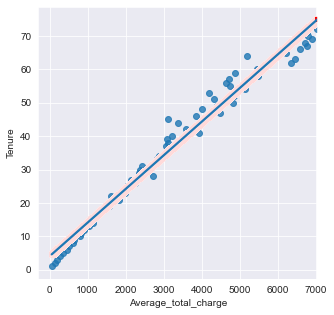

In [161]:
#Now I eliminate all insignificant variables, and only TotalCharges left (where p>0.05)

mdl_total_vs_tenure = ols("Tenure ~ Average_total_charge", data=total_vs_tenure).fit()

#Making predictions inside a dataframe
    # First, I need to define min and max values of TotalCharges as integers

min_total = int(total_vs_tenure["Average_total_charge"].min())
max_total = int(total_vs_tenure["Average_total_charge"].max())

explanatory_data = pd.DataFrame({"Average_total_charge": np.arange(min_total, max_total+1)})

prediction_data = explanatory_data.assign(Tenure = mdl_total_vs_tenure.predict(explanatory_data))

#Showing predictions

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()

sns.regplot(x="Average_total_charge",
            y="Tenure",
            ci=None,
            data=total_vs_tenure)
sns.scatterplot(x="Average_total_charge", #adding a layer to your plot containing prediction_data 
                y="Tenure",
                data=prediction_data,
                color="red",
                marker="s")
plt.show()

We can say as much as a customer's total charge is higher, tenure lenght increases

In [162]:
mdl_total_vs_tenure.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2936.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           6.78e-59
Time:                        13:09:22   Log-Likelihood:                -185.26
No. Observations:                  72   AIC:                             374.5
Df Residuals:                      70   BIC:                             379.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0298      0.709      5.683      0.000       2.616       5.444
Average_total_charge     0.0101      0.000     54.186      0.000       0.010       0.010
==============================================================================
Omnibus:                        6.498   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.845
Skew:                           0.675   Prob(JB):                       0.0538
Kurtosis:                       3.357   Cond. No.                     7.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**V: Dividing the model into 2 from a breaking point**

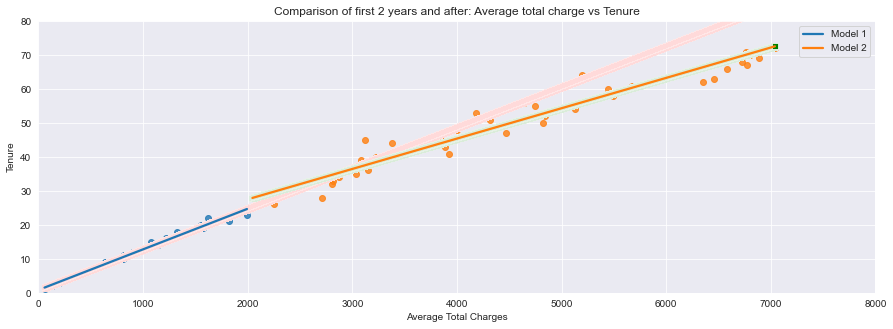

In [190]:
totten1 = total_vs_tenure.loc[:23,:]
totten2 = total_vs_tenure.loc[24:,:]

mdl1 = ols("Tenure ~ Average_total_charge", data=totten1).fit()
mdl2 = ols("Tenure ~ Average_total_charge", data=totten2).fit()

#Making predictions inside a dataframe
    # First, I need to define min and max values of TotalCharges as integers

min_totten1 = int(totten1["Average_total_charge"].min())
max_totten1 = int(totten1["Average_total_charge"].max())
min_totten2 = int(totten2["Average_total_charge"].min())
max_totten2 = int(totten2["Average_total_charge"].max())

explanatory_data1 = pd.DataFrame({"Average_total_charge": np.arange(min_totten1, max_totten2+1)})
                        #I use max_totten2 to see what would happen if I continued with same model
explanatory_data2 = pd.DataFrame({"Average_total_charge": np.arange(min_totten2, max_totten2+1)})

prediction_data1 = explanatory_data1.assign(Tenure = mdl1.predict(explanatory_data1))
prediction_data2 = explanatory_data2.assign(Tenure = mdl2.predict(explanatory_data2))

#Showing predictions

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,5))
sns.regplot(x="Average_total_charge",
            y="Tenure",
            ci=None,
            data=totten1)

sns.regplot(x="Average_total_charge",
            y="Tenure",
            ci=None,
            data=totten2)

sns.scatterplot(x="Average_total_charge", #adding a layer to your plot containing prediction_data 
                y="Tenure",
                data=prediction_data1,
                color="red",
                marker="s")

sns.scatterplot(x="Average_total_charge", #adding a layer to your plot containing prediction_data 
                y="Tenure",
                data=prediction_data2,
                color="green",
                marker="s")

plt.xlim(0,8000)
plt.ylim(0,80)

plt.xlabel("Average Total Charges")
plt.ylabel("Tenure")
plt.title("Comparison of first 2 years and after: Average total charge vs Tenure")
plt.legend(['Model 1', 'Model 2'], loc=0)
plt.savefig('Model_1_Model_2.png')

plt.show()

In [192]:
mdl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1686.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.75e-22
Time:                        14:22:27   Log-Likelihood:                -28.266
No. Observations:                  24   AIC:                             60.53
Df Residuals:                      22   BIC:                             62.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8453      0.330      2.564      0.018       0.162       1.529
Average_total_charge     0.0119      0.000     41.057      0.000       0.011       0.013
==============================================================================
Omnibus:                        0.989   Durbin-Watson:                   2.935
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.163
Skew:                           0.099   Prob(JB):                        0.922
Kurtosis:                       3.352   Cond. No.                     2.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
mdl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     848.7
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.72e-31
Time:                        14:22:36   Log-Likelihood:                -123.05
No. Observations:                  48   AIC:                             250.1
Df Residuals:                      46   BIC:                             253.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.6534      1.412      6.839      0.000       6.812      12.495
Average_total_charge     0.0089      0.000     29.132      0.000       0.008       0.010
==============================================================================
Omnibus:                        4.955   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.410
Skew:                           0.742   Prob(JB):                        0.110
Kurtosis:                       3.028   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**VI: Let's create a logistic model instead**

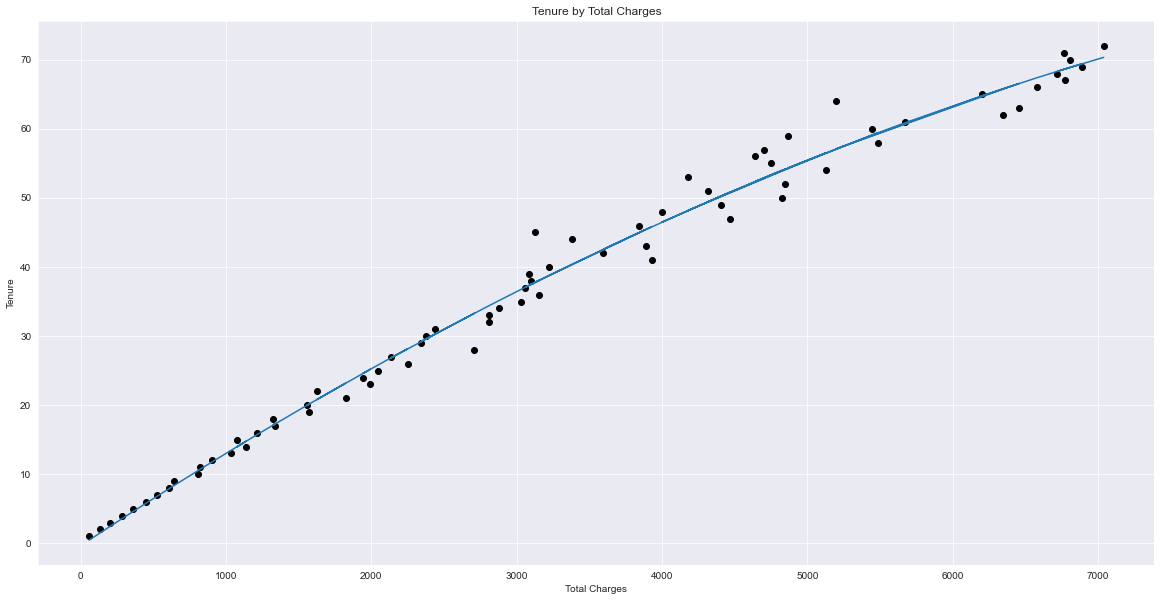

In [210]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
X = total_vs_tenure[["Average_total_charge"]]
y = total_vs_tenure.Tenure
logreg.fit(X,y)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

fig = plt.figure(figsize=(20,10))
plt.scatter(X, y, c="black")
plt.xlabel("Total Charges")
plt.ylabel("Tenure")
plt.title("Tenure by Total Charges")
plt.plot(X, y_pred)
plt.savefig('LogReg.png')
plt.show()

**VI: PREDICTIONS \ REGRESSION GUI (GRAPHICAL USER INTERFACE)**

In [258]:
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

logreg = linear_model.LogisticRegression()
X = total_vs_tenure[["Average_total_charge"]]
y = total_vs_tenure.Tenure
logreg.fit(X,y)

pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_

print('Intercept: \n', theta0)
print('Coefficients: \n', theta1, theta2)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

Intercept_result = ('Intercept: ', theta0)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

Coefficients_result  = ('Coefficients: ', theta1, theta2)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

label1 = tk.Label(root, text='Prediction of How Long a customer retains')
label1.config(font=('Arial', 15))
canvas1.create_window(250, 50, window=label1)

# Total Charges label and input box
label2 = tk.Label(root, text='Type expected total charges of customer : ')
canvas1.create_window(150, 100, window=label2)

entry1 = tk.Entry (root) # create entry box
canvas1.create_window(330, 100, window=entry1)

def pred(v):
    return pr_model.predict(pre_process.fit_transform([[v]]))

def values(): 
    global TotalCharges #our input variable
    TotalCharges = int(entry1.get()) 
    
    Prediction_result  = ('Predicted tenure of the customer: ', pred(TotalCharges))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='yellow')
    canvas1.create_window(250, 190, window=label_Prediction)
                    
      
button1 = tk.Button (root, text='Predict tenure of a customer',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(250, 150, window=button1)
 
root.mainloop()

Intercept: 
 -0.3432679488789745
Coefficients: 
 0.01390687252302325 -5.490573352689243e-07
